<h1 align='center'>
    Jacobiano do Manipulador PUMA 260
<h1>

<div align="center">
    <img src="puma260.png">
</div>

In [1]:
import numpy as np
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
puma = Robot((
    [theta1, 13, 0, rad(-90)],
    [theta2, d1, 8, 0],
    [theta3+rad(90), 0, 0, rad(90)],
    [theta4, 8, 0, rad(-90)],
    [theta5-rad(90), 0, 0, rad(90)],
    [theta6, d2, 0, 0]
))

### $$\text{Obtenção de } o_i^0 \text{ :}$$

In [8]:
n = len(puma.T) #número de juntas

o = [Matrix([[0], [0], [0]])]
for i in range(1, n+1):
    o.append(puma.HTM(0, i)[:3, 3])

o

⎡⎡0⎤  ⎡0 ⎤  ⎡8⋅c₁⋅c₂ - d₁⋅s₁⎤  ⎡8⋅c₁⋅c₂ - d₁⋅s₁⎤  ⎡8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢               ⎥  ⎢               ⎥  ⎢                          ⎥
⎢⎢0⎥, ⎢0 ⎥, ⎢c₁⋅d₁ + 8⋅c₂⋅s₁⎥, ⎢c₁⋅d₁ + 8⋅c₂⋅s₁⎥, ⎢c₁⋅d₁ + 8⋅c₂⋅s₁ + 8⋅c₂₃⋅s₁⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢               ⎥  ⎢               ⎥  ⎢                          ⎥
⎣⎣0⎦  ⎣13⎦  ⎣   13 - 8⋅s₂   ⎦  ⎣   13 - 8⋅s₂   ⎦  ⎣    -8⋅s₂ - 8⋅s₂₃ + 13    ⎦

  ⎡8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁⎤  ⎡8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁⎤⎤
  ⎢                          ⎥  ⎢                          ⎥⎥
, ⎢c₁⋅d₁ + 8⋅c₂⋅s₁ + 8⋅c₂₃⋅s₁⎥, ⎢c₁⋅d₁ + 8⋅c₂⋅s₁ + 8⋅c₂₃⋅s₁⎥⎥
  ⎢                          ⎥  ⎢                          ⎥⎥
  ⎣    -8⋅s₂ - 8⋅s₂₃ + 13    ⎦  ⎣    -8⋅s₂ - 8⋅s₂₃ + 13    ⎦⎦

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

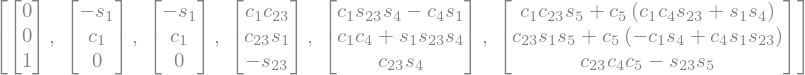

In [9]:
z = [Matrix([[0], [0], [1]])]
for i in range(1, n):
    z.append(puma.HTM(0, i)[:3, 2])

z

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

In [28]:
jv = []
for i in range(1, n+1):
    jv.append(Matrix(np.cross(np.squeeze(z[i-1]), np.squeeze(o[-1] - o[i-1])).tolist()))

jv

⎡                                                                             
⎢⎡-c₁⋅d₁ - 8⋅c₂⋅s₁ - 8⋅c₂₃⋅s₁⎤  ⎡                        c₁⋅(-8⋅s₂ - 8⋅s₂₃)   
⎢⎢                           ⎥  ⎢                                             
⎢⎢8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁ ⎥, ⎢                        s₁⋅(-8⋅s₂ - 8⋅s₂₃)   
⎢⎢                           ⎥  ⎢                                             
⎣⎣             0             ⎦  ⎣-c₁⋅(8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁) - s₁⋅(c₁⋅d₁ 

                        ⎡       -8⋅c₁⋅s₂₃       ⎤               ⎤
                     ⎤  ⎢                       ⎥  ⎡0⎤  ⎡0⎤  ⎡0⎤⎥
                     ⎥  ⎢       -8⋅s₁⋅s₂₃       ⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
                     ⎥, ⎢                       ⎥, ⎢0⎥, ⎢0⎥, ⎢0⎥⎥
                     ⎥  ⎢      2               2⎥  ⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥
+ 8⋅c₂⋅s₁ + 8⋅c₂₃⋅s₁)⎦  ⎣- 8⋅c₁ ⋅c₂₃ - 8⋅c₂₃⋅s₁ ⎦  ⎣0⎦  ⎣0⎦  ⎣0⎦⎦

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

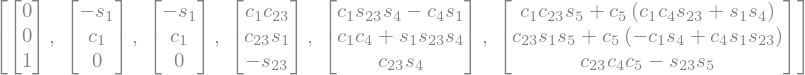

In [31]:
jw = []
for i in range(1, n+1):
    jw.append(z[i-1])

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

In [49]:
J = []
for k in range(3):
    J.append([])
    for i in range(n):
        J[k].append(jv[i][k])
for k in range(3):
    J.append([])
    for i in range(n):
        J[k+3].append(jw[i][k])

Matrix(J)

⎡-c₁⋅d₁ - 8⋅c₂⋅s₁ - 8⋅c₂₃⋅s₁                          c₁⋅(-8⋅s₂ - 8⋅s₂₃)      
⎢                                                                             
⎢8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁                           s₁⋅(-8⋅s₂ - 8⋅s₂₃)      
⎢                                                                             
⎢                                                                             
⎢             0               -c₁⋅(8⋅c₁⋅c₂ + 8⋅c₁⋅c₂₃ - d₁⋅s₁) - s₁⋅(c₁⋅d₁ + 8
⎢                                                                             
⎢             0                                              -s₁              
⎢                                                                             
⎢             0                                               c₁              
⎢                                                                             
⎣             1                                               0               

                           -8⋅c₁⋅s₂₃           0   